In [0]:
# requests is one of the best libraries on python for capturing web site data
import requests
page = requests.get("https://benchmarks.ul.com/compare/best-smartphones")

# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [0]:
# Return a list of all <a> elements that have class="OneLinkToTx" from
# the entire page.
onelinks = soup.find_all('a',class_="OneLinkNoTx")

In [0]:
print(len(onelinks))

200


In [0]:
# Collect the name of the phone, and the url to the detail page
# of each phone
phones = []
for link in onelinks:
    phone = {}
    phone['name'] = link.get_text()
    phone['url'] = link['href']
    phones.append(phone)
print(phones)

[{'name': 'Xiaomi Black Shark', 'url': 'http://benchmarks.ul.com/hardware/phone/Xiaomi+Black+Shark+review'}, {'name': 'Samsung Galaxy S9+ (SDM845)', 'url': 'http://benchmarks.ul.com/hardware/phone/Samsung+Galaxy+S9*2B+%28SDM845%29+review'}, {'name': 'Samsung Galaxy S9 (SDM845)', 'url': 'http://benchmarks.ul.com/hardware/phone/Samsung+Galaxy+S9+%28SDM845%29+review'}, {'name': 'OnePlus 6', 'url': 'http://benchmarks.ul.com/hardware/phone/OnePlus+6+review'}, {'name': 'Sony Xperia XZ2 Compact', 'url': 'http://benchmarks.ul.com/hardware/phone/Sony+Xperia+XZ2+Compact+review'}, {'name': 'Sony Xperia XZ2', 'url': 'http://benchmarks.ul.com/hardware/phone/Sony+Xperia+XZ2+review'}, {'name': 'Asus ZenFone 4 Pro', 'url': 'http://benchmarks.ul.com/hardware/phone/Asus+ZenFone+4+Pro+review'}, {'name': 'Sony Xperia XZ1 Compact', 'url': 'http://benchmarks.ul.com/hardware/phone/Sony+Xperia+XZ1+Compact+review'}, {'name': 'Razer Phone', 'url': 'http://benchmarks.ul.com/hardware/phone/Razer+Phone+review'}, {

In [0]:
# parse sublink loads the url specified by link and captures
# important data columns for our examination
# sseu and ss
# chipset
# memory
# os
# weight
# display size
# tensorflow
# popularity

# helper method, called below
def parse_sublink(link):
    page = requests.get(link)
    soup = BeautifulSoup(page.content, 'html.parser')
    sseu = 0
    ss = 0
    chipset = ''
    memory = ''
    os = ''
    weight = ''
    display_size = ''
    tensorflow = 0
    popularity = ''
    
    # try/except prevents failure during error conditions
    # try happens first, if there is an error, execution ends, and runs
    # "except" afterward.
    try:
        chipset_element = soup.find(string="Chipset")
        chipset = chipset_element.find_next('span').get_text()
    except:
        None
    try:
        sseu_element = soup.find(string="Sling Shot Extreme Unlimited")
        next_span = sseu_element.find_next('span')
        sseu_text = next_span.get_text()
        sseu = int(sseu_text)
    except:
        None
    try:
        ss = int(soup.find(string="Sling Shot").find_next('span').get_text())
    except:
        None
    try:
        popularity = float(soup.find(string="Popularity").find_next('span').get_text()[:-1])
    except:
        None
    try:
        tensorflow = int(soup.find(string="TensorFlow").find_next('span').get_text())
    except:
        None
    # pack the values into a single python dictionary object before returning
    return {'sseu':sseu,'ss':ss,'chipset':chipset,'popularity':popularity,'tensorflow':tensorflow}

# iterate over all the phones that we loaded from the original phone list website
# (the one with 200 phones, the 200 names and urls)
for i,phone in enumerate(phones):
    # Print out i whenever i is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(i%20==0):
        print(i)
    # load the website, parse it into sublink dictionary object
    sublink = parse_sublink(phone['url'])
    # Try to load all the expected values into the current phone object
    try:
        phone['sseu'] = sublink['sseu']
    except:
        None
    try:
        phone['ss'] = sublink['ss']
    except:
        None
    try:
        phone['chipset'] = sublink['chipset']
    except:
        None
    try:
        phone['popularity'] = sublink['popularity']
    except:
        None
    try:
        phone['tensorflow'] = sublink['tensorflow']
    except:
        None


In [0]:
print(phones)

[{'name': 'Xiaomi Black Shark', 'url': 'http://benchmarks.ul.com/hardware/phone/Xiaomi+Black+Shark+review', 'sseu': 5048, 'ss': 6273, 'chipset': 'Snapdragon 845', 'popularity': 0.6}, {'name': 'Samsung Galaxy S9+ (SDM845)', 'url': 'http://benchmarks.ul.com/hardware/phone/Samsung+Galaxy+S9*2B+%28SDM845%29+review', 'sseu': 4995, 'ss': 6169, 'chipset': 'Snapdragon 845', 'popularity': 1.7}, {'name': 'Samsung Galaxy S9 (SDM845)', 'url': 'http://benchmarks.ul.com/hardware/phone/Samsung+Galaxy+S9+%28SDM845%29+review', 'sseu': 5001, 'ss': 6134, 'chipset': 'Snapdragon 845', 'popularity': 0.7}, {'name': 'OnePlus 6', 'url': 'http://benchmarks.ul.com/hardware/phone/OnePlus+6+review', 'sseu': 4917, 'ss': 6121, 'chipset': 'Snapdragon 845', 'popularity': 2.3}, {'name': 'Sony Xperia XZ2 Compact', 'url': 'http://benchmarks.ul.com/hardware/phone/Sony+Xperia+XZ2+Compact+review', 'sseu': 4415, 'ss': 5999, 'chipset': 'Snapdragon 845', 'popularity': 0.2}, {'name': 'Sony Xperia XZ2', 'url': 'http://benchmarks

In [0]:
# Lets create a dataframe object to store all the data that is in the list
# of phones above
import pandas as pd
df_Phones = pd.DataFrame(columns=['name','sseu','ss','price','popularity','chipset']) # tensorflow

# iterate over phones list and create a new df_Phones row for each one
for i in range(len(phones)):
    phone = phones[i]
    df_Phones.loc[len(df_Phones)]=[phone['name'],phone['sseu'],phone['ss'],0,phone['popularity'],phone['chipset']]

# Observe new data
print(df_Phones.head())

# Save to a file in colab instance
df_Phones.to_csv('phones.csv')


                          name  sseu    ss price  popularity         chipset
0           Xiaomi Black Shark  5048  6273     0         0.6  Snapdragon 845
1  Samsung Galaxy S9+ (SDM845)  4995  6169     0         1.7  Snapdragon 845
2   Samsung Galaxy S9 (SDM845)  5001  6134     0         0.7  Snapdragon 845
3                    OnePlus 6  4917  6121     0         2.3  Snapdragon 845
4      Sony Xperia XZ2 Compact  4415  5999     0         0.2  Snapdragon 845


In [0]:
from google.colab import files

# download the same file to my local machine
files.download('phones.csv')

In [0]:
# This portion loads the previously saved file from a preceeding session
# (This way we don't have to crawl all 200 web pages again and again).
from google.colab import files
import pandas as pd

# Creates upload dialog for you to pick the file previously downloaded
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Load that uploaded file into the expected DataFrame
df_Phones = pd.read_csv('phones.csv')

Saving phones.csv to phones (1).csv
User uploaded file "phones.csv" with length 6621 bytes


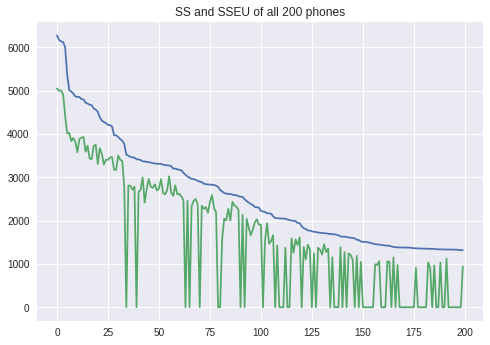

Chipsets of phones
['Snapdragon 845' 'Snapdragon 835 (MSM8998)' 'Apple A11'
 'Exynos 9 Octa (9810)' 'Snapdragon 820 (MSM8996)'
 'Snapdragon 821 (MSM8996 Pro)' 'Exynos 9 Octa (8895)'
 'HiSilicon Kirin 970' 'MT6799' 'Apple A9' 'Apple A10'
 'Exynos 8 Octa (8890)' 'Snapdragon 810 (MSM8994)' 'HiSilicon Kirin 960'
 'Snapdragon 660 (MSM8976 Plus)' 'Snapdragon 805 (APQ8084)'
 'Snapdragon 805 (APQ8084AB Pro)' 'Snapdragon 808 (MSM8992)'
 'Exynos 7 Octa (7420)' 'MT6771' 'Apple A8' 'Snapdragon 653 (MSM8976 Pro)'
 'Snapdragon 636' 'Snapdragon 652 (MSM8976)' 'Snapdragon 650 (MSM8956)'
 'Snapdragon 630' 'MT6797' 'Snapdragon 801 (MSM8974AC v3)' 'MT6797T']


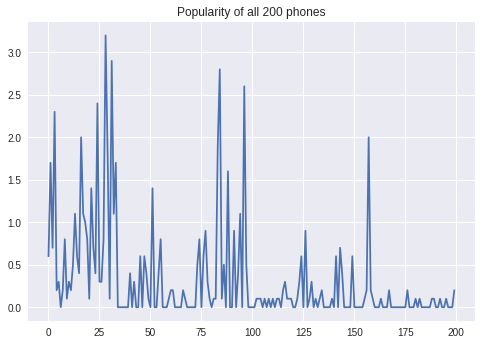

In [0]:
import matplotlib.pyplot as plt
plt.plot(df_Phones['ss'])
plt.plot(df_Phones['sseu'])
plt.title('SS and SSEU of all 200 phones')
plt.show()
plt.plot(df_Phones['popularity'])
plt.title('Popularity of all 200 phones')
print('Chipsets of phones')
print(df_Phones['chipset'].unique())

In [0]:
import requests
from bs4 import BeautifulSoup
df_Phones.loc[0]['price'] = 9876
# Now df_Phones is our favorite data source
for i in range(len(df_Phones)):
    if(i%20==0):
        print(i)
    phone = df_Phones.loc[i]
    name_words = phone['name'].split(' ')
   
    price = []
    private = []
    while(len(price) == 0):
        request = 'https://camelcamelcamel.com/search?sq=new '+ ' '.join(name_words)
        page = requests.get(request)
        soup = BeautifulSoup(page.content, 'html.parser')
        try:
            price = soup.find_all('div',{'class':'price_amazon'})[0]
            private = soup.find_all('div',{'class':'price_new'})[0]
            break
        except:
            name_words = name_words[:-1]
    if('$' in price.get_text()):
        phone['price'] = float(price.get_text().strip()[1:].replace(',',''))
    elif('$' in private.get_text()):
        phone['price'] = float(private.get_text().strip()[1:].replace(',',''))
    else:
        phone['price'] = 9999.0
    df_Phones.loc[i] = phone

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


20
40
60
80


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


100
120
140
160
180


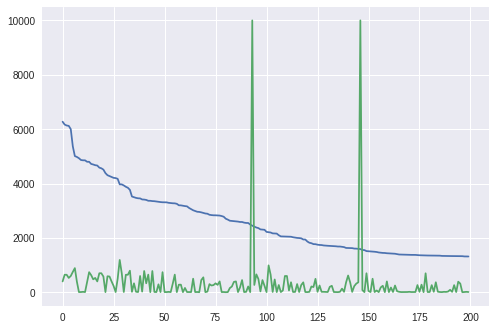

In [0]:
import matplotlib.pyplot as plt
plt.plot(df_Phones[['ss','price']])

In [0]:
print(df_Phones[['name','price']].head(40))

                                           name   price
0                            Xiaomi Black Shark  399.99
1                   Samsung Galaxy S9+ (SDM845)  644.99
2                    Samsung Galaxy S9 (SDM845)  644.99
3                                     OnePlus 6  527.93
4                       Sony Xperia XZ2 Compact  599.99
5                               Sony Xperia XZ2  749.99
6                            Asus ZenFone 4 Pro  889.15
7                       Sony Xperia XZ1 Compact  389.99
8                                   Razer Phone    7.99
9                                ZTE Nubia Z17S    8.99
10                       Motorola Moto Z2 Force   16.99
11                                ZTE Nubia Z17    7.99
12                                      Nokia 8  377.28
13               Samsung Galaxy Note8 (MSM8998)  739.99
14                            Google Pixel 2 XL     630
15                              Sony Xperia XZ1  476.68
16                                   OnePlus 5T 

In [0]:
import numpy as np
lt200 = df_Phones[df_Phones['price']<200]
mid = lt200[lt200['price']>100]
print(mid)
# How many phones have bad prices?
print(np.sum(df_Phones['price']<50))

                        name  sseu    ss   price  popularity  \
60                ZTE Axon 7  2617  3170  159.99         0.2   
82          Xiaomi Mi Note 2  2045  2632     156         0.1   
87                    HTC 10  2348  2586  180.68         0.0   
123          Huawei Nexus 6P  1443  1772  192.95         0.3   
131          Sony Xperia Z3+  1453  1707  199.99         0.1   
137   Samsung Galaxy S5 Plus     0  1671     135         0.0   
156              LG Nexus 5X   990  1457  179.99         0.2   
161  Samsung Galaxy S5 LTE-A     0  1424   174.9         0.0   

                          chipset  
60       Snapdragon 820 (MSM8996)  
82   Snapdragon 821 (MSM8996 Pro)  
87       Snapdragon 820 (MSM8996)  
123      Snapdragon 810 (MSM8994)  
131      Snapdragon 810 (MSM8994)  
137      Snapdragon 805 (APQ8084)  
156      Snapdragon 808 (MSM8992)  
161      Snapdragon 805 (APQ8084)  
94


## Observations

Crawling efficiency of the above is pretty horrible at camelcamelcamel:

$94/200$ of the phones have a price < $50, meaning they are just accessory prices. Not good.

New idea: Include the chipset in the phone name for searching. Also, lets do ebay and see if the results are any better.



In [0]:
import requests
from bs4 import BeautifulSoup

# Now df_Phones is our favorite data source
for i in range(len(df_Phones)):
    if(i%20==0):
        print(i)
    phone = df_Phones.loc[i]
    name_words = phone['name'].split(' ')
    chipset_words = phone['chipset'].split(' ')
    search_words = name_words + chipset_words
   
    price = []
    while(len(price) == 0):
        request = 'https://www.ebay.com/sch/i.html?_sop=15&_nkw='+ ' '.join(search_words)
        page = requests.get(request)
        soup = BeautifulSoup(page.content, 'html.parser')
        try:
            price = soup.find_all('span',{'class':'s-item__price'})[0].get_text().split(' ')[0]
        except:
            search_words = search_words[:-1]
    if('$' in price):
        phone['price'] = float(price[1:].replace(',',''))
    else:
        phone['price'] = 9999.0
    df_Phones.loc[i] = phone
    df_Phones.loc[i]['request'] = request
    print(request, price)
        

0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:769: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value


https://www.ebay.com/sch/i.html?_sop=15&_nkw=Xiaomi Black Shark Snapdragon 845 $579.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy S9+ (SDM845) Snapdragon 845 $669.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy S9 (SDM845) Snapdragon 845 $669.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=OnePlus 6 Snapdragon 845 $587.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Sony Xperia XZ2 Compact Snapdragon 845 $584.98
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Sony Xperia XZ2 Snapdragon 845 $584.98
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Asus ZenFone 4 Pro Snapdragon 835 (MSM8998) $488.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Sony Xperia XZ1 Compact Snapdragon 835 (MSM8998) $312.00
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Razer Phone Snapdragon 835 (MSM8998) $709.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=ZTE Nubia Z17S Snapdragon 835 (MSM8998) $379.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Motorola Moto Z2 Force Snapdragon 835 $37

https://www.ebay.com/sch/i.html?_sop=15&_nkw=Vivo Xplay5 Ultimate Snapdragon 820 (MSM8996) $764.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Huawei P20 HiSilicon Kirin 970 $815.00
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Huawei Honor 10 HiSilicon Kirin 970 $499.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy Note8 (Exynos 9 $3.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy S8 Active Snapdragon 835 (MSM8998) $549.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Huawei P20 Pro HiSilicon Kirin 970 $815.00
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Zuk Edge Snapdragon 821 (MSM8996 $410.00
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Vivo Xplay6 Snapdragon 820 (MSM8996) $764.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy S7 (MSM8996) Snapdragon 820 (MSM8996) $40.30
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Huawei Mate 10 Pro HiSilicon Kirin 970 $560.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=OnePlus 3 Snapdragon 820 (MSM8996) $4

https://www.ebay.com/sch/i.html?_sop=15&_nkw=LG Isai Beat Snapdragon 820 (MSM8996) $450.00
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy S7 (Exynos 8 $3.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Apple iPhone 6s Plus Apple A9 $0.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Motorola Moto X Force Snapdragon 810 $370.00
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Apple iPhone 6s Apple A9 $1.69
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Huawei Mate 9 HiSilicon Kirin 960 $469.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy S7 Edge (Exynos 8 $299.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Motorola DROID Turbo 2 Snapdragon 810 (MSM8994) $111.00
100
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Huawei Mate 9 Porsche Design HiSilicon Kirin 960 $1,678.98
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy Note 7 (Exynos 8 $3.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Huawei Mate 9 Pro HiSilicon Kirin 960 $495.99
https://www.ebay.com/sch/i.

https://www.ebay.com/sch/i.html?_sop=15&_nkw=LG X mach Snapdragon 808 (MSM8992) $320.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy S6 Edge+ Exynos 7 Octa (7420) $164.99
140
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Lenovo Vibe X3 Snapdragon 808 (MSM8992) $3.12
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy S6 Edge Exynos 7 Octa (7420) $201.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=ZTE Nubia Z9 Snapdragon 810 (MSM8994) $387.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy S6 Exynos 7 Octa (7420) $201.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy Note 5 Exynos 7 Octa (7420) $273.98
https://www.ebay.com/sch/i.html?_sop=15&_nkw=BlackBerry Priv Snapdragon 808 (MSM8992) $229.95
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Samsung Galaxy S6 Active Exynos 7 Octa (7420) $269.95
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Nextbit Robin Snapdragon 808 (MSM8992) $234.89
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Fujitsu Arrow

https://www.ebay.com/sch/i.html?_sop=15&_nkw=Asus ZenFone 4 ZE554KL S630 Snapdragon 630 $159.00
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Vodafone Smart platinum 7 Snapdragon 652 (MSM8976) $121.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Xiaomi Mi Max (MSM8976) Snapdragon 652 (MSM8976) $208.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=HTC One (M8) (MSM8974AC v3) Snapdragon 801 (MSM8974AC $2.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Lenovo Phab 2 Pro Snapdragon 652 (MSM8976) $544.71
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Xiaomi MI-4C Snapdragon 808 (MSM8992) $148.00
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Sony Xperia X Snapdragon 650 (MSM8956) $166.98
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Alcatel Idol 4S Snapdragon 652 (MSM8976) $121.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Vernee Apollo MT6797T $212.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Nokia 6 (2018) Snapdragon 630 $199.99
https://www.ebay.com/sch/i.html?_sop=15&_nkw=Oppo R9 Plus Snap

## Renewed analysis...

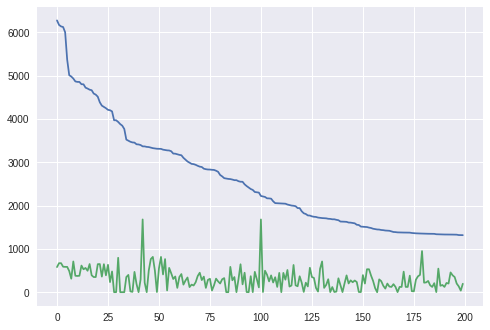

In [0]:
import matplotlib.pyplot as plt
plt.plot(df_Phones[['ss','price']])

In [0]:
import numpy as np
lt200 = df_Phones[df_Phones['price']<200]
mid = lt200[lt200['price']>100]
print(mid)
# How many phones have bad prices?
print(np.sum(df_Phones['price']<50))

                                    name  sseu    ss   price  popularity  \
39                       LeTV Le Max Pro     0  3414     190         0.0   
59                        LeEco Le Pro 3  2606  3183  100.01         0.1   
62                            ZUK Z2 Pro  2466  3102     175         0.0   
65                     BlackBerry DTEK60     0  2990  118.41         0.0   
66                                ZUK Z2  2325  2962     175         0.2   
67                        LeEco Le Max 2  2455  2956     155         0.1   
77                           Xiaomi Mi 5  2290  2822  159.99         0.9   
80               Sharp Aquos Serie SHV34     0  2706  199.99         0.0   
91                                LG V20  2133  2549   181.5         0.9   
99                Motorola DROID Turbo 2  1906  2299     111         0.0   
108                             Oppo R11  1428  2053  121.99         0.1   
114                       Gigaset ME Pro     0  2011     130         0.0   
115         